In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [31]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [32]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [33]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
Measurement = Base.classes.measurement
Station= Base.classes.station

In [37]:
# Save references to each table
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [56]:
# Find the most recent date in the data set.
query_date1=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
query_date1=dt.datetime(2017,8,23)

In [126]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
sel = [Measurement.date, 
       Measurement.prcp]

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)
query_date=dt.datetime(2016,8,23)
# Perform a query to retrieve the data and precipitation scores
results=session.query(*sel).all()
query_results = [{"Date": result[0], "PRCP": result[1]} for result in results]

df = pd.DataFrame(query_results)
df = pd.DataFrame(results, columns=['Date', 'PCRP'])
df2=df[(df['Date'] > '2016-08-22') & (df['Date'] < '2017-08-24')]
df2.max()

Query Date:  2016-08-23


Date    2017-08-23
PCRP           6.7
dtype: object

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


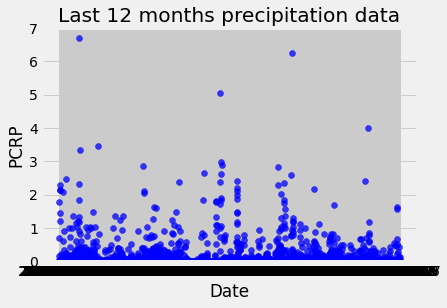

In [136]:
# Save the query results as a Pandas DataFrame and set the index to the date column
date=df2['Date']
data=df2['PCRP']
# Use Pandas Plotting with Matplotlib to plot the data
plt.ylim(0,7)
plt.title("Last 12 months precipitation data")
plt.xlabel("Date")
plt.ylabel("PCRP")
plt.scatter(date, data, marker="o", facecolors="blue",
             alpha=0.75)

# Exploratory Station Analysis

In [156]:
# Design a query to calculate the total number stations in the dataset

session.query(func.count(Station.station)).all()


[(9,)]

In [171]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

results= session.query(Measurement.station,func.count(Measurement.date)).group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
station_results = [{"Station ID": result[0], "Total": result[1]} for result in results]
df3=pd.DataFrame(station_results)
df3.head()
sel=[Station.station,Station.name]
name=session.query(*sel).order_by(Station.station).all()
name1=[{"Station name": result[1],"Station ID":result[0]} for result in name]
df4=pd.DataFrame(name1)
display(df3, df4, pd.merge(df3, df4, how='outer'))

,Station ID,Total
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


,Station name,Station ID
0,"HONOLULU OBSERVATORY 702.2, HI US",USC00511918
1,"KANEOHE 838.1, HI US",USC00513117
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830
3,"MANOA LYON ARBO 785.2, HI US",USC00516128
4,"PEARL CITY, HI US",USC00517948
5,"UPPER WAHIAWA 874.3, HI US",USC00518838
6,"WAIHEE 837.5, HI US",USC00519281
7,"WAIKIKI 717.2, HI US",USC00519397
8,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523


,Station ID,Total,Station name
0,USC00519281,2772,"WAIHEE 837.5, HI US"
1,USC00519397,2724,"WAIKIKI 717.2, HI US"
2,USC00513117,2709,"KANEOHE 838.1, HI US"
3,USC00519523,2669,"WAIMANALO EXPERIMENTAL FARM, HI US"
4,USC00516128,2612,"MANOA LYON ARBO 785.2, HI US"
5,USC00514830,2202,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
6,USC00511918,1979,"HONOLULU OBSERVATORY 702.2, HI US"
7,USC00517948,1372,"PEARL CITY, HI US"
8,USC00518838,511,"UPPER WAHIAWA 874.3, HI US"


In [179]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel=[Measurement.station,
     func.max(Measurement.tobs),
     func.min(Measurement.tobs),
     func.avg(Measurement.tobs)]
temp=session.query(*sel).\
   filter(Measurement.station == 'USC00519281').all()
temp1=pd.DataFrame([{"Station ID": result[0],"Highest Temperature":result[1],"Lowest Temperature":result[2],"Average Temperature":result[3]} for result in temp])

display(pd.merge(temp1,df4,how='inner'))

,Station ID,Highest Temperature,Lowest Temperature,Average Temperature,Station name
0,USC00519281,85.0,54.0,71.663781,"WAIHEE 837.5, HI US"


In [184]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel=[Measurement.station,
     Measurement.date,
     Measurement.tobs]

data=session.query(*sel).filter(Measurement.date > '2016-8-22').all()
query_data = pd.DataFrame([{"Station ID": result[0], "Date":result[1],"Obesevation Data": result[2]} for result in data])
query_data.head()

,Station ID,Date,Obesevation Data
0,USC00519397,2017-01-01,62.0
1,USC00519397,2017-01-02,66.0
2,USC00519397,2017-01-03,63.0
3,USC00519397,2017-01-04,62.0
4,USC00519397,2017-01-05,63.0


# Close session

In [185]:
# Close Session
session.close()